In [270]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.text import Annotation
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as mpatches
from numpy import matlib

DATA_DIMENSION = 3
argument_resolution = 256



class Annotation3D(Annotation):
    def __init__(self, text, xyz, *args, **kwargs):
        super().__init__(text, xy=(0,0), *args, **kwargs)
        self._xyz = xyz
 
    def draw(self, renderer):
        x2, y2, z2 = proj_transform(*self._xyz, renderer.M)
        self.xy=(x2,y2)
        super().draw(renderer)
 
def _annotate3D(ax,text, xyz, *args, **kwargs):
    '''Add anotation `text` to an `Axes3d` instance.'''
 
    annotation= Annotation3D(text, xyz, *args, **kwargs)
    ax.add_artist(annotation)
 
setattr(Axes3D,'annotate3D',_annotate3D)
 
class Arrow3D(FancyArrowPatch):
    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._xyz = (x,y,z)
        self._dxdydz = (dx,dy,dz)
 
    def draw(self, renderer):
        x1,y1,z1 = self._xyz
        dx,dy,dz = self._dxdydz
        x2,y2,z2 = (x1+dx,y1+dy,z1+dz)
 
        xs, ys, zs = proj_transform((x1,x2),(y1,y2),(z1,z2), renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        super().draw(renderer)
 
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''
 
    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)
 
setattr(Axes3D,'arrow3D',_arrow3D)

class ellipsoid:
    def __init__(self, if_draw=False):
        super(ellipsoid, self).__init__()
        self.phi = np.linspace(0,2 *np.pi, argument_resolution).reshape(argument_resolution, 1) # the angle of the projection in the xy-plane 
        self.theta = np.linspace(0, np.pi, argument_resolution).reshape(-1, argument_resolution) # the angle from the polar axis, ie the polar angle 
        self.x = np.sin(self.theta)*np.cos(self.phi) 
        self.y = np.sin(self.theta)*np.sin(self.phi) 
        self.z = np.cos(self.theta) 
        self.z_iterated = np.zeros((len(self.z[0]), len(self.z[0])))
        for i in range(len(self.z[0])):
            self.z_iterated[i] = self.z
               
        #self.phi = np.linspace(0,2 *np.pi, 256).reshape(256, 1) # the angle of the projection in the xy-plane 
        #self.theta = np.linspace(0, np.pi, 256).reshape(-1, 256) # the angle from the polar axis, ie the polar angle 
        
        if(if_draw):
            self.fig = plt.figure(figsize=(20, 20)) # Square figure 
            self.ax = self.fig.add_subplot(111, projection='3d')


        
    def draw_ellipsoid(self, unit_ellipsoid_axes, radius_list, ellipsoid_center):
        #if ifexchange_axes:
        #    wire_frame_coordinates = wire_frame_coordinates[axes_exchange, :, :]
        #    unit_ellipsoid_axes = unit_ellipsoid_axes[axes_exchange, :] 
        #    unit_ellipsoid_axes = unit_ellipsoid_axes[:, axes_exchange] 
        #    radius_list = radius_list[axes_exchange]
        
        wire_frame_coordinates = np.stack([self.x, self.y, self.z_iterated]).transpose([1, 2, 0])
        x_transformed, y_transformed, z_transformed = np.zeros(self.x.shape), np.zeros(self.y.shape), np.zeros(self.z_iterated.shape)

        for i in range(len(self.x)):
            for j in range(len(self.y)):
                x_transformed[i][j], y_transformed[i][j], z_transformed[i][j] = np.dot((unit_ellipsoid_axes.T)*radius_list, wire_frame_coordinates[i][j]) + ellipsoid_center[0]
                #print((np.dot((unit_ellipsoid_axes.T)*radius_list, wire_frame_coordinates[i][j]).shape))
        
        wire_frame_coordinates = np.stack([x_transformed , y_transformed, z_transformed]) 
        #print(wire_frame_coordinates.shape)
                        
        #self.ax.arrow3D(ellipsoid_center[0][0], ellipsoid_center[0][1], ellipsoid_center[0][2], unit_ellipsoid_axes[0][0]*radius_list[0], unit_ellipsoid_axes[0][1]*radius_list[0], unit_ellipsoid_axes[0][2]*radius_list[0],
        #               mutation_scale=20,  arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
        #self.ax.arrow3D(ellipsoid_center[0][0], ellipsoid_center[0][1], ellipsoid_center[0][2], unit_ellipsoid_axes[1][0]*radius_list[1], unit_ellipsoid_axes[1][1]*radius_list[1], unit_ellipsoid_axes[1][2]*radius_list[1],
        #               mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
        #self.ax.arrow3D(ellipsoid_center[0][0], ellipsoid_center[0][1], ellipsoid_center[0][2], unit_ellipsoid_axes[2][0]*radius_list[2], unit_ellipsoid_axes[2][1]*radius_list[2], unit_ellipsoid_axes[2][2]*radius_list[2],
        #               mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
         
        #self.ax.arrow3D(2*ellipsoid_center[0][0] - unit_ellipsoid_axes[0][0]*radius_list[0], 2*ellipsoid_center[0][1] - unit_ellipsoid_axes[0][1]*radius_list[0], 2*ellipsoid_center[0][2] - unit_ellipsoid_axes[0][2]*radius_list[0], unit_ellipsoid_axes[0][0]*radius_list[0], unit_ellipsoid_axes[0][1]*radius_list[0], unit_ellipsoid_axes[0][2]*radius_list[0],
        #               mutation_scale=20,  arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
        #self.ax.arrow3D(ellipsoid_center[0][0], ellipsoid_center[0][1], ellipsoid_center[0][2], unit_ellipsoid_axes[1][0]*radius_list[1], unit_ellipsoid_axes[1][1]*radius_list[1], unit_ellipsoid_axes[1][2]*radius_list[1],
        #               mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
        #self.ax.arrow3D(ellipsoid_center[0][0], ellipsoid_center[0][1], ellipsoid_center[0][2], unit_ellipsoid_axes[2][0]*radius_list[2], unit_ellipsoid_axes[2][1]*radius_list[2], unit_ellipsoid_axes[2][2]*radius_list[2],
        #               mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)    
            
        
        #self.ax.arrow3D(0, 0, 0, unit_ellipsoid_axes[0][0]*radius_list[0]*6, unit_ellipsoid_axes[0][1]*radius_list[0]*6, unit_ellipsoid_axes[0][2]*radius_list[0]*6,
        #               mutation_scale=20,  arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
        #self.ax.arrow3D(ellipsoid_center[0][0], ellipsoid_center[0][1], ellipsoid_center[0][2], unit_ellipsoid_axes[1][0]*radius_list[1], unit_ellipsoid_axes[1][1]*radius_list[1], unit_ellipsoid_axes[1][2]*radius_list[1],
        #               mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)
        #self.ax.arrow3D(ellipsoid_center[0][0], ellipsoid_center[0][1], ellipsoid_center[0][2], unit_ellipsoid_axes[2][0]*radius_list[2], unit_ellipsoid_axes[2][1]*radius_list[2], unit_ellipsoid_axes[2][2]*radius_list[2],
        #               mutation_scale=20, arrowstyle="-|>", fc='orange', ec='orange', lw = 5)  
        
        #self.ax.text(ellipsoid_center[0][0]+unit_ellipsoid_axes[0][0] , ellipsoid_center[0][1]+unit_ellipsoid_axes[0][1], ellipsoid_center[0][2]+unit_ellipsoid_axes[0][2], r'$v_0$', fontsize=20)
        #self.ax.text(ellipsoid_center[0][0]+unit_ellipsoid_axes[1][0] , ellipsoid_center[0][1]+unit_ellipsoid_axes[1][1], ellipsoid_center[0][2]+unit_ellipsoid_axes[1][2], r'$v_1$', fontsize=20)
        #self.ax.text(ellipsoid_center[0][0]+unit_ellipsoid_axes[2][0] , ellipsoid_center[0][1]+unit_ellipsoid_axes[2][1], ellipsoid_center[0][2]+unit_ellipsoid_axes[2][2], r'$v_2$', fontsize=20)

        self.ax.plot_wireframe(wire_frame_coordinates[0], wire_frame_coordinates[1], wire_frame_coordinates[2], color='black',rcount=10, ccount=10) 



        grid_range = 10
        #self.ax.set_xlim(-grid_range, grid_range)
        #self.ax.set_ylim(-grid_range, grid_range)
        #self.ax.set_zlim(-grid_range, grid_range)
        #ax.view_init(elev=-180, azim=-60)

        #self.ax.set_xlabel('x', fontsize=30)
        #self.ax.set_ylabel('y', fontsize=30)
        #self.ax.set_zlabel('z', fontsize=30)
        
    def draw_film(self, x, y, z, random_normal_coordinates):
        wire_density = 10
        self.ax.plot_wireframe(x, y, z,rcount=wire_density, ccount=wire_density, antialiased=False)
        self.ax.scatter(random_normal_coordinates[:, 0], random_normal_coordinates[:, 1], random_normal_coordinates[:, 2], color='red', s=100)


        
        
    def show(self, grid_range=10):
        self.ax.set_xlim(-grid_range, grid_range)
        self.ax.set_ylim(-grid_range, grid_range)
        self.ax.set_zlim(-grid_range, grid_range)
        plt.show()
        
        
def grape_piece_moment(start_point, center_of_piece):
    orthonormal_matrix, _ = np.linalg.qr(np.c_[(center_of_piece - start_point).T, np.ones((3, 2))])
    if(int(np.sign(orthonormal_matrix[0][0]))!=int(np.sign(center_of_piece-start_point)[0][0])):
        orthonormal_matrix = -orthonormal_matrix
    radius=5
    berry_size_noise = 0.06
    radius_list = np.array([0.6, 0.3, 0.4]) + np.random.normal(0, berry_size_noise, 3)
    radius_list = radius_list*radius
    return orthonormal_matrix.T, radius_list

[[-0.46866487  2.87053277  9.56767447]
 [ 0.7160456  -5.75620366  8.14575952]
 [ 4.17168931  4.45938242  7.91902246]
 [-0.13839391 -2.90524565  9.56767447]
 [ 2.49209269  2.11821134  9.45000819]
 [ 1.65506152  7.43757181  6.47636449]
 [-3.66825294 -2.88474599  8.84432931]
 [-4.82462842 -5.56791801  6.761749  ]
 [-3.8703017   6.41817467  6.6202567 ]
 [ 5.29793463 -6.11414249  5.87785252]
 [-3.49758368  3.08945747  8.84432931]
 [-0.98396172  6.02668255  7.91902246]
 [ 2.2862669  -7.52070013  6.18158986]
 [ 4.43682339 -3.48915648  8.25471897]
 [ 6.35930312  5.00101125  5.87785252]
 [-2.46496561 -7.58638408  6.0308143 ]
 [-6.26293719  4.55029022  6.33012454]
 [-6.26293719  4.55029022  6.33012454]]
18


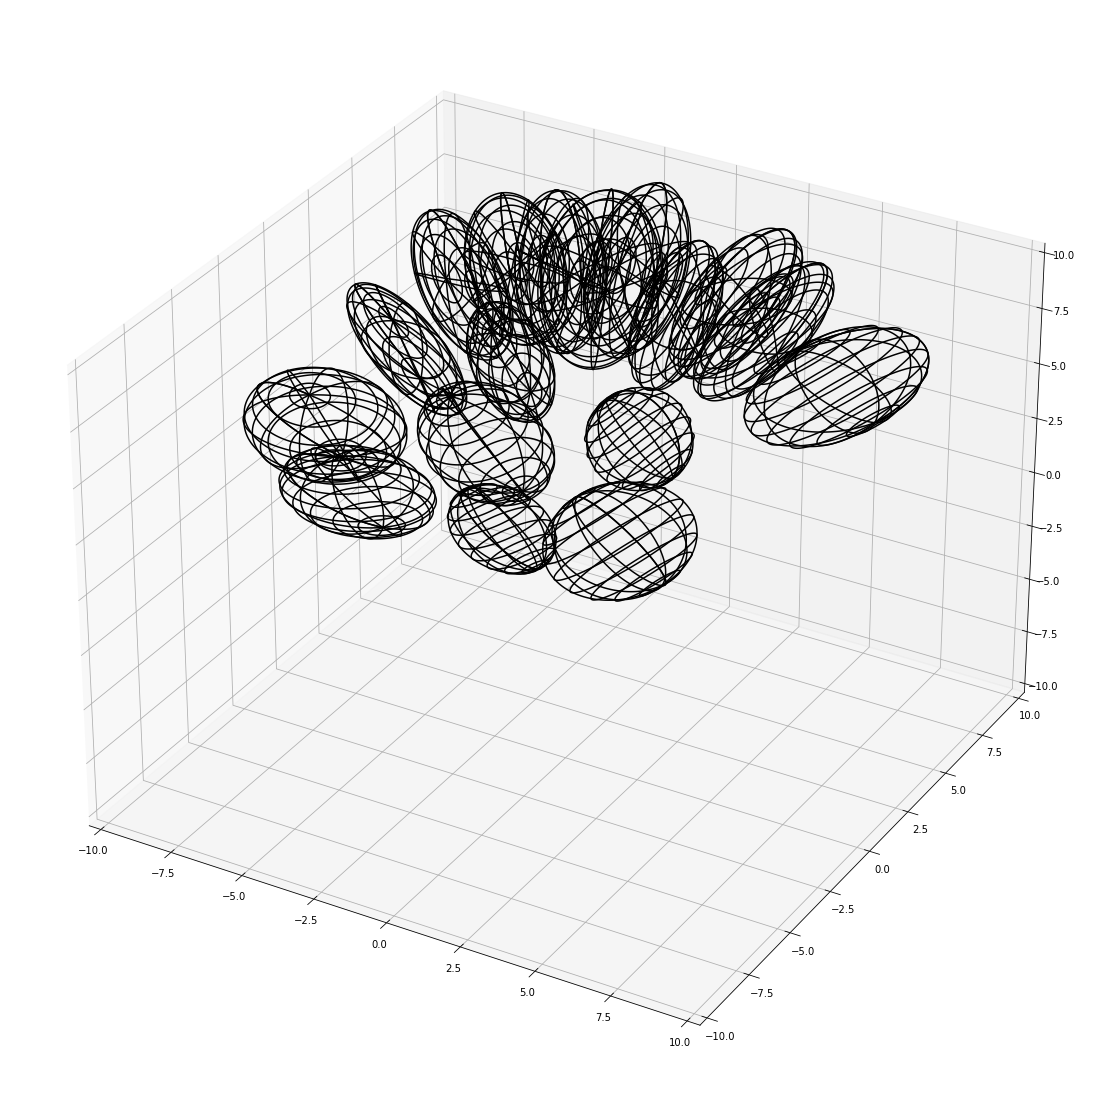

In [271]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D



alpha = 0.2
beta = 0.3
u = np.linspace(np.pi*alpha , np.pi*(1-alpha), 100)
v = np.linspace(-1*np.pi*beta , np.pi*(beta), 100)
x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

polar_coordinates =  np.stack([x, y, z]).transpose([1, 2, 0]) 



number_of_random_points =20

#random_polar_coordinates = np.random.randint(0,100,size=[number_of_random_points,2])
random_normal_coordinates = normal_coordinate_temp = polar_coordinates[tuple(np.random.randint(0, 100, 2))].reshape((1, 3))

berry_piece_interval = 3
iter_threshold = 1000

cnt = 1
iter_counter = 0
iter_thresh = 10000

while(cnt<=number_of_random_points):
        
    normal_coordinate_temp = polar_coordinates[tuple(np.random.randint(0, 100, 2))].reshape((1, 3))
    #print(polar_coordinate_temp.shape)
    
    if(np.count_nonzero(np.sqrt(((random_normal_coordinates[:cnt]-normal_coordinate_temp)**2).sum(axis=1)) > berry_piece_interval)==cnt):
        random_normal_coordinates[cnt-1] = normal_coordinate_temp
        random_normal_coordinates=np.concatenate((random_normal_coordinates, normal_coordinate_temp), axis=0)
        cnt = cnt + 1
        
    iter_counter = iter_counter + 1
    
    if(iter_counter > iter_thresh):
        break
    
    
    
         
    #print(random_normal_coordinates)
    

print(random_normal_coordinates)


ellipsoid_test = ellipsoid(if_draw=True)

print(len(random_normal_coordinates))
for i in range(len(random_normal_coordinates)-1):
    start_point = np.array([[0, 0, 0]])
    center_of_piece = np.array([random_normal_coordinates[i]])
    unit_ellipsoid_axes, radius_list = grape_piece_moment(start_point, center_of_piece)
    ellipsoid_test.draw_ellipsoid(unit_ellipsoid_axes, radius_list, center_of_piece)
    #ellipsoid_test.draw_film(x, y, z, random_normal_coordinates)
    
ellipsoid_test.show()

In [272]:
a = np.arange(3)

In [273]:
a

array([0, 1, 2])

In [274]:
np.sqrt((a**2).sum())

2.23606797749979

In [275]:
np.linalg.norm(a)

2.23606797749979

In [276]:
np.arccos(-1)/np.pi

1.0

In [277]:
a, b = np.random.normal(0, 0.01, 2)

In [278]:
a, b

(-0.002304541821314574, 0.0011064166303311202)

In [279]:
def make_small_grape_bunch(center_of_bunch, alpha, beta, number_of_random_points, interval):
    
    
    radius = np.linalg.norm(center_of_bunch)
    theta = np.arccos(center_of_bunch[2]/radius)
    phi = np.arctan(center_of_bunch[1] / center_of_bunch[0])
    
    #alpha, beta = 1, 1
    

    u = np.linspace(phi - np.pi*alpha/5 , phi + np.pi*alpha/5, 100)
    v = np.linspace(theta - np.pi*beta/5 ,theta + np.pi*beta/5, 100)
    x = radius * np.outer(np.cos(u), np.sin(v))
    y = radius * np.outer(np.sin(u), np.sin(v))
    z = radius * np.outer(np.ones(np.size(u)), np.cos(v))

    polar_coordinates =  np.stack([x, y, z]).transpose([1, 2, 0]) 

    #random_polar_coordinates = np.random.randint(0,100,size=[number_of_random_points,2])
    random_normal_coordinates  = polar_coordinates[tuple(np.random.randint(0, 100, 2))].reshape((1, 3))

    berry_piece_interval = interval
    iter_threshold = 1000

    cnt = 1
    iter_counter = 0
    iter_thresh = 10000

    while(cnt<=number_of_random_points):
        
        normal_coordinate_temp = polar_coordinates[tuple(np.random.randint(0, 100, 2))].reshape((1, 3))
        #print(polar_coordinate_temp.shape)
    
        if(np.count_nonzero(np.sqrt(((random_normal_coordinates[:cnt]-normal_coordinate_temp)**2).sum(axis=1)) > berry_piece_interval)==cnt):
            random_normal_coordinates[cnt-1] = normal_coordinate_temp
            random_normal_coordinates=np.concatenate((random_normal_coordinates, normal_coordinate_temp), axis=0)
            cnt = cnt + 1
        
        iter_counter = iter_counter + 1
    
        if(iter_counter > iter_thresh):
            break
            
    
    return random_normal_coordinates, x, y, z
    
    
    

In [280]:
def make_grape_stem(number_of_random_points, interval):
    
    #alpha, beta = 1, 1
    
    radius = 20
    radius_list = np.array([0.4, 0.5, 0.7])*radius

    u = np.linspace(0, 2*np.pi, 100)
    v = np.linspace(0 ,np.pi, 100)
    x = radius_list[0] * np.outer(np.cos(u), np.sin(v))
    y = radius_list[1] * np.outer(np.sin(u), np.sin(v))
    z = radius_list[2] * np.outer(np.ones(np.size(u)), np.cos(v))


    polar_coordinates =  np.stack([x, y, z]).transpose([1, 2, 0]) 

    #random_polar_coordinates = np.random.randint(0,100,size=[number_of_random_points,2])
    random_normal_coordinates  = polar_coordinates[tuple(np.random.randint(0, 100, 2))].reshape((1, 3))

    berry_piece_interval = interval
    iter_threshold = 1000

    cnt = 1
    iter_counter = 0
    iter_thresh = 10000

    while(cnt<=number_of_random_points):
        
        normal_coordinate_temp = polar_coordinates[tuple(np.random.randint(0, 100, 2))].reshape((1, 3))
        #print(polar_coordinate_temp.shape)
    
        if(np.count_nonzero(np.sqrt(((random_normal_coordinates[:cnt]-normal_coordinate_temp)**2).sum(axis=1)) > berry_piece_interval)==cnt):
            random_normal_coordinates[cnt-1] = normal_coordinate_temp
            random_normal_coordinates=np.concatenate((random_normal_coordinates, normal_coordinate_temp), axis=0)
            cnt = cnt + 1
        
        iter_counter = iter_counter + 1
    
        if(iter_counter > iter_thresh):
            break
            
    
    return random_normal_coordinates, x, y, z
    
    

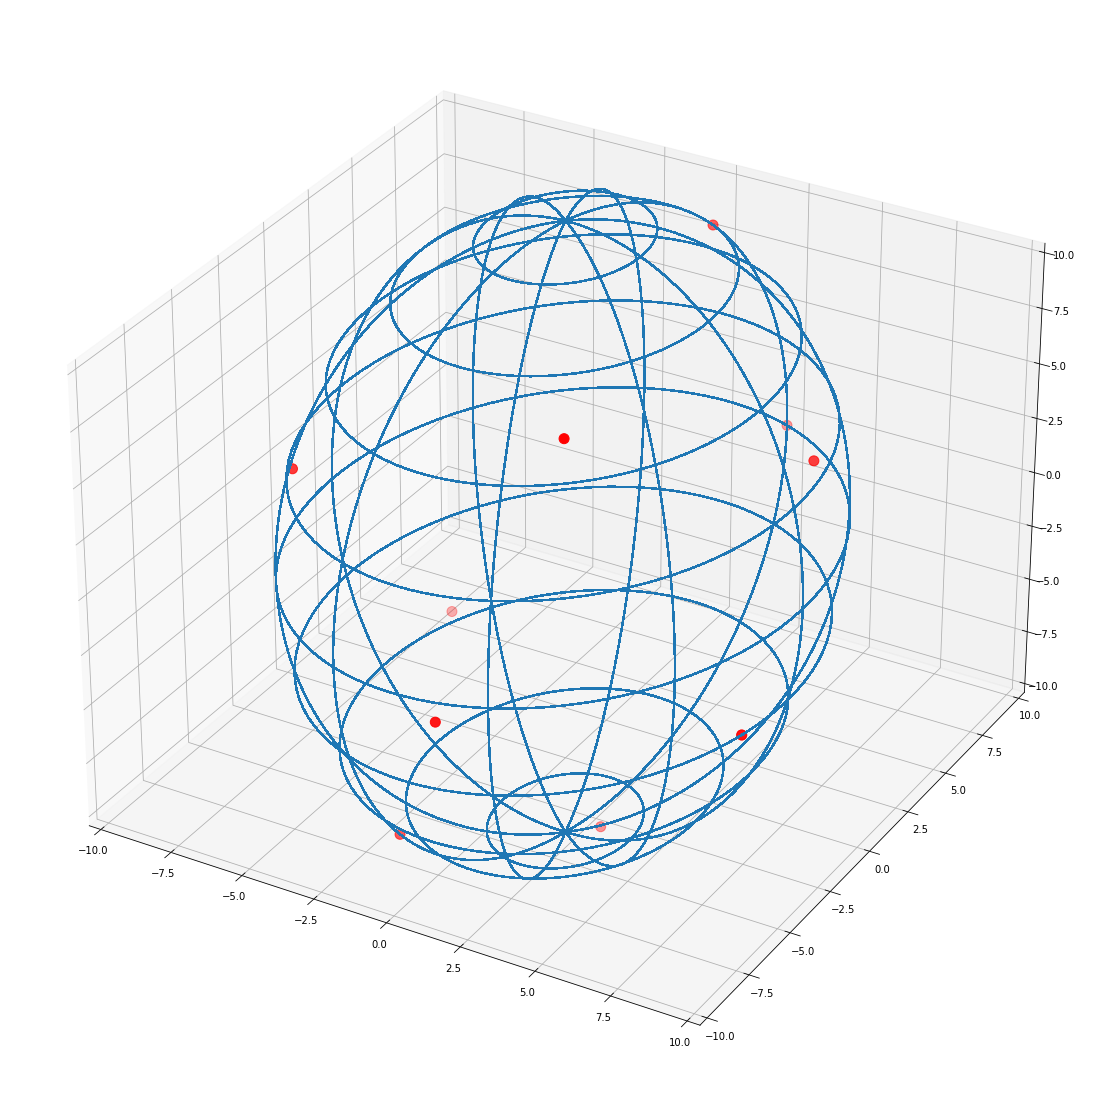

In [281]:
number_of_random_points = 10
interval = 9
small_bunch_list, x, y, z = make_grape_stem(number_of_random_points, interval)
ellipsoid_stem = ellipsoid(if_draw=True)
ellipsoid_stem.draw_film(x, y, z, small_bunch_list)
ellipsoid_stem.show()

In [282]:
small_bunch_list

array([[  2.37506401,   9.54782046,  -0.22212349],
       [ -5.96991935,   3.26588373,  -8.12079673],
       [  1.38481612,  -9.81710312,  -1.1094994 ],
       [  0.85197079,   0.68441048, -13.88736738],
       [  7.33813273,   1.76788645,   4.9964071 ],
       [ -5.56949753,  -6.22860835,   4.9964071 ],
       [  1.52685391,   6.13799329,  10.7246222 ],
       [  3.40883997,  -5.9838074 ,   9.49913176],
       [ -1.56599563,  -7.08030458,  -9.49913176],
       [  7.31769852,  -2.37335054,  -4.57895149],
       [  7.31769852,  -2.37335054,  -4.57895149]])

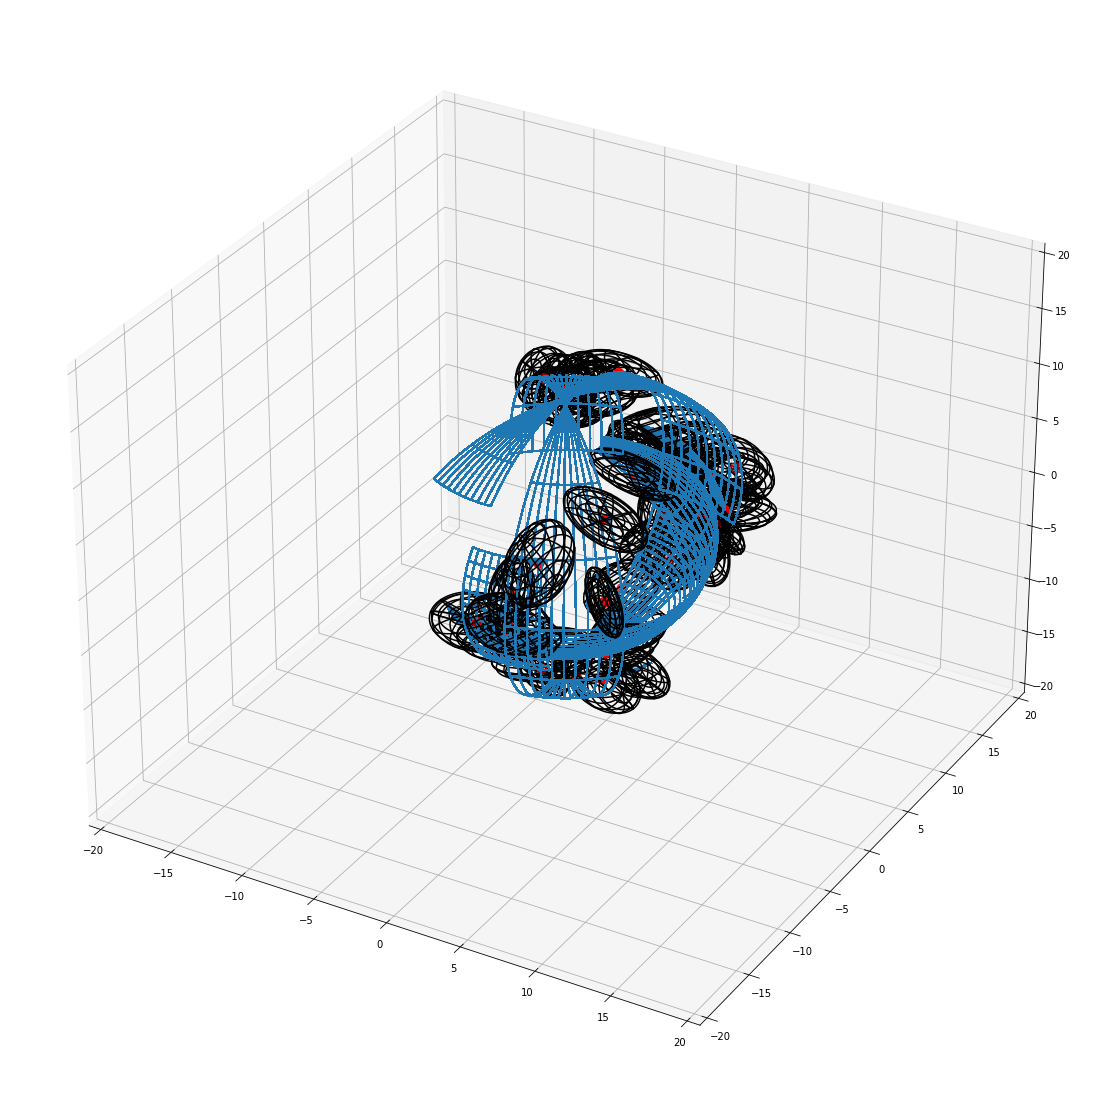

In [283]:
ellipsoid_test = ellipsoid(if_draw=True)


for j in range(small_bunch_list.shape[0]-1):
    alpha, beta = np.random.normal(0, 1, 2)
    number_of_random_points = 5
    interval = 2
    random_normal_coordinates, x, y, z = make_small_grape_bunch(small_bunch_list[j], alpha, beta, number_of_random_points, interval)
    
    
    for i in range(len(random_normal_coordinates)-1):
        start_point = small_bunch_list[j]
        center_of_piece = np.array([random_normal_coordinates[i]])
        unit_ellipsoid_axes, radius_list = grape_piece_moment(start_point, center_of_piece)
        ellipsoid_test.draw_ellipsoid(unit_ellipsoid_axes, radius_list, center_of_piece)
        #ellipsoid_test.draw_film(x, y, z, random_normal_coordinates)
    
    ellipsoid_test.draw_film(x, y, z, random_normal_coordinates)
    
grid_range = 20
ellipsoid_test.show(grid_range)
    

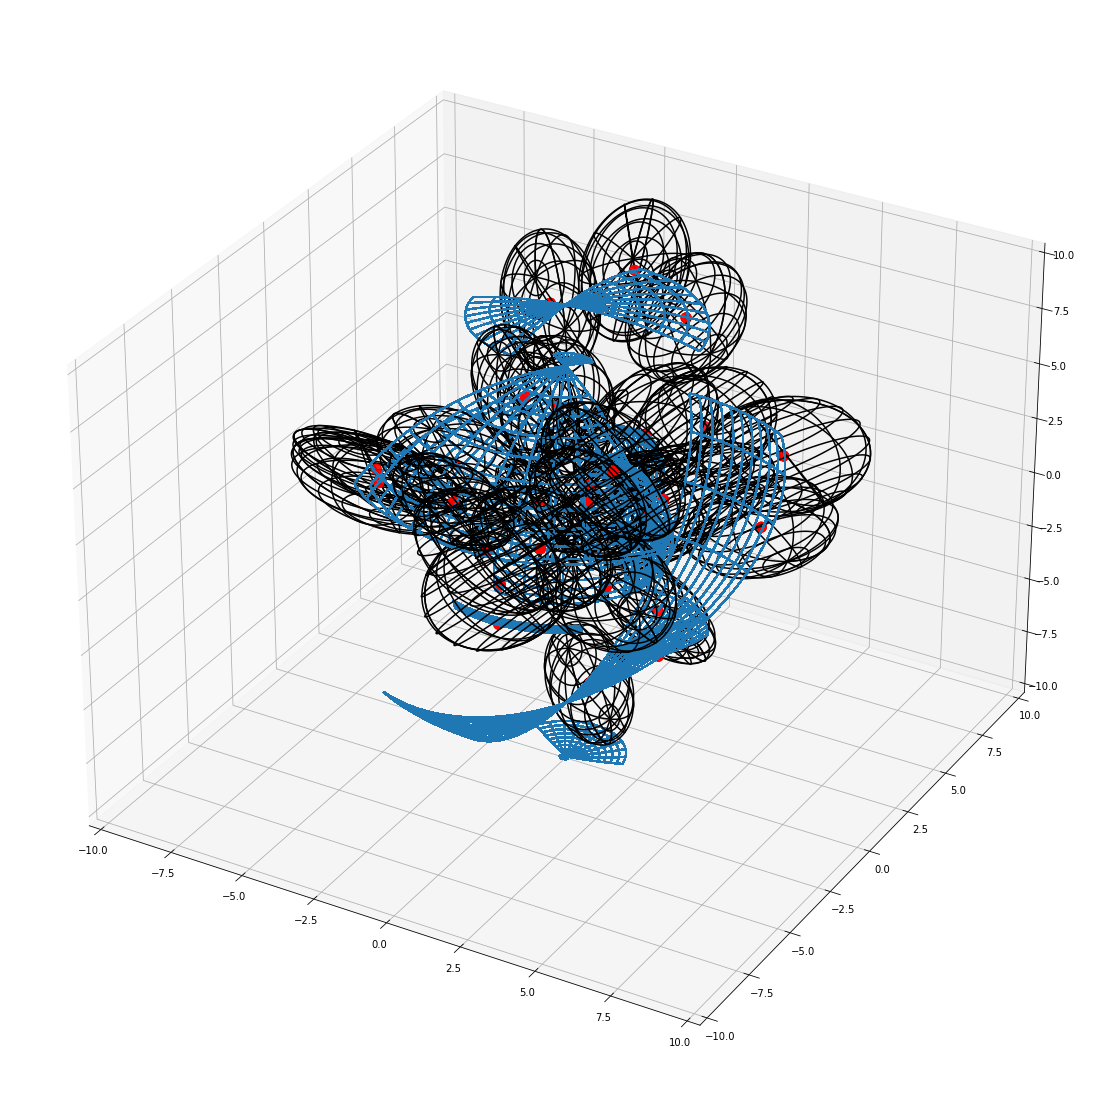

In [210]:
ellipsoid_test = ellipsoid(if_draw=True)


for j in range(small_bunch_list.shape[0]-1):
    alpha, beta = np.random.normal(0, 1, 2)
    number_of_random_points = 5
    interval = 3
    random_normal_coordinates, x, y, z = make_small_grape_bunch(small_bunch_list[j], alpha, beta, number_of_random_points, interval)
    
    
    for i in range(len(random_normal_coordinates)-1):
        start_point = np.array([[0, 0, 0]])
        center_of_piece = np.array([random_normal_coordinates[i]])
        unit_ellipsoid_axes, radius_list = grape_piece_moment(start_point, center_of_piece)
        ellipsoid_test.draw_ellipsoid(unit_ellipsoid_axes, radius_list, center_of_piece)
        ellipsoid_test.draw_film(x, y, z, random_normal_coordinates)
    
    ellipsoid_test.draw_film(x, y, z, random_normal_coordinates)
    
ellipsoid_test.show()
    

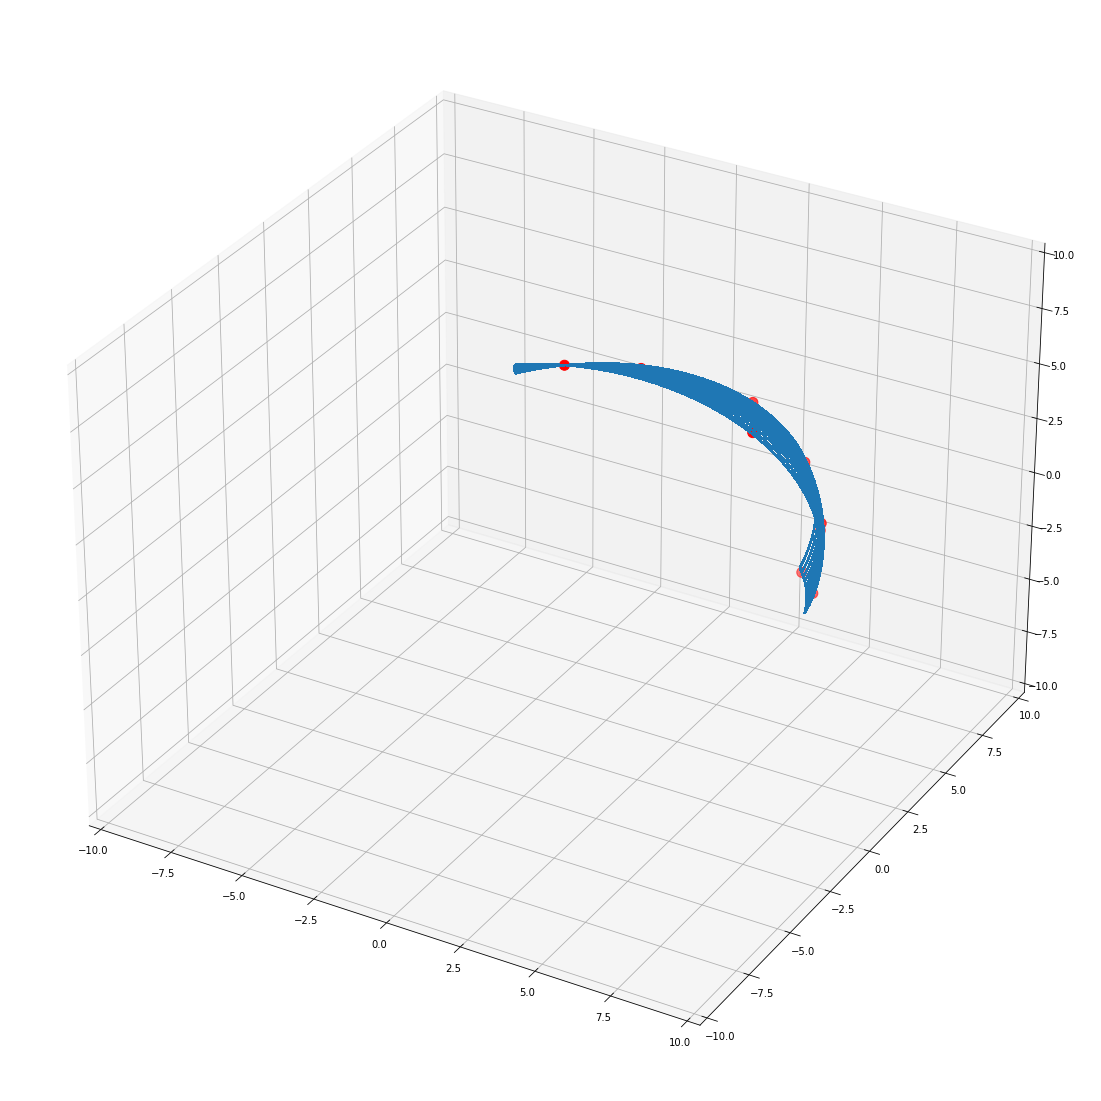

In [148]:
alpha, beta = np.random.normal(0, 1, 2)
number_of_random_points = 10
interval = 2
random_normal_coordinates, x, y, z = make_small_grape_bunch(np.array([-5, -3, 5]), alpha, beta, number_of_random_points, interval)
ellipsoid_test = ellipsoid(if_draw=True)
ellipsoid_test.draw_film(x, y, z, random_normal_coordinates)
ellipsoid_test.show()

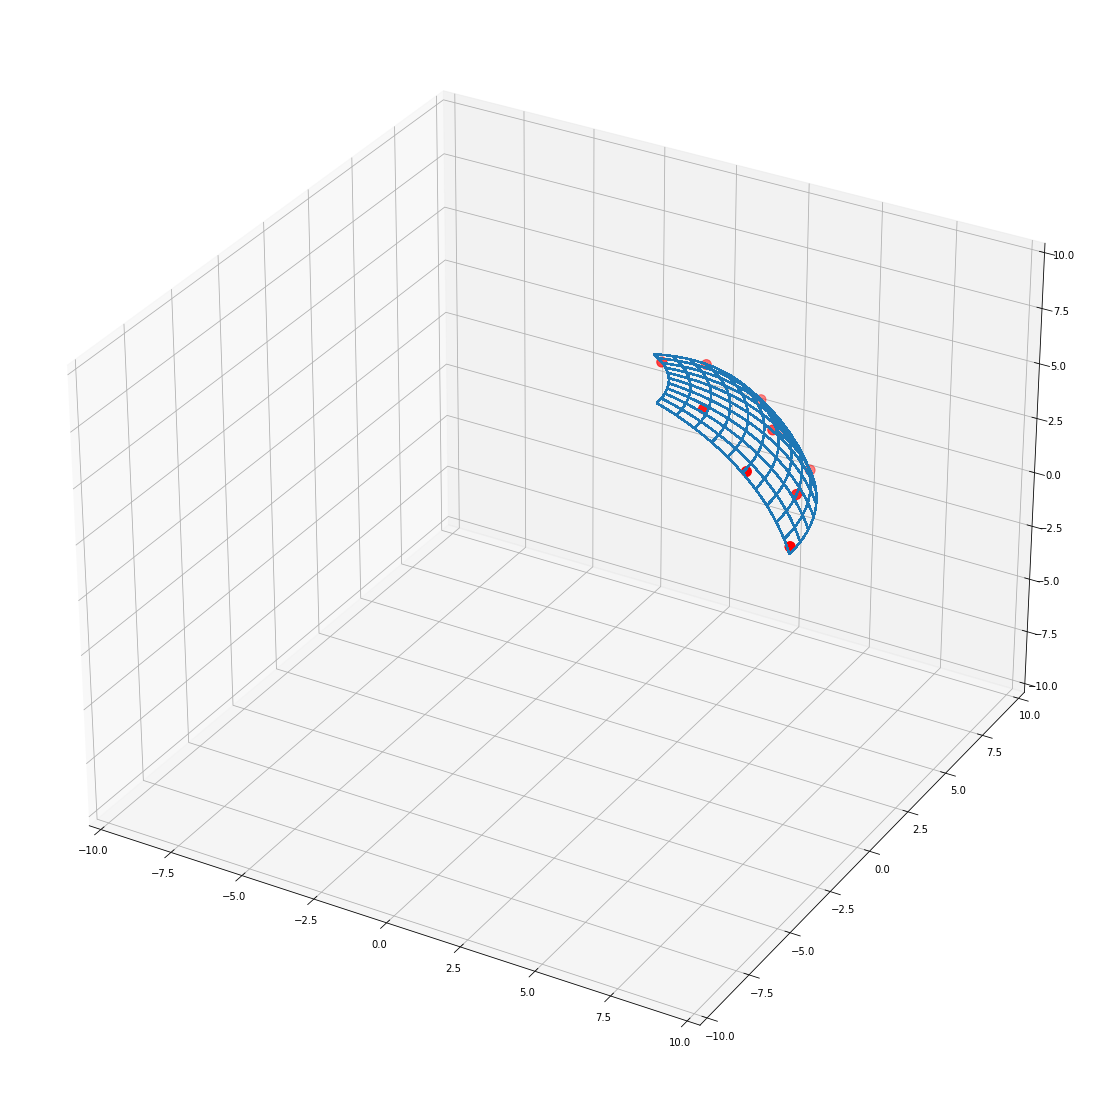

In [149]:
alpha, beta = np.random.normal(0, 1, 2)
number_of_random_points = 10
interval = 2
random_normal_coordinates, x, y, z = make_small_grape_bunch(np.array([-5, -3, 5]), alpha, beta, number_of_random_points, interval)
ellipsoid_test = ellipsoid(if_draw=True)
ellipsoid_test.draw_film(x, y, z, random_normal_coordinates)
ellipsoid_test.show()

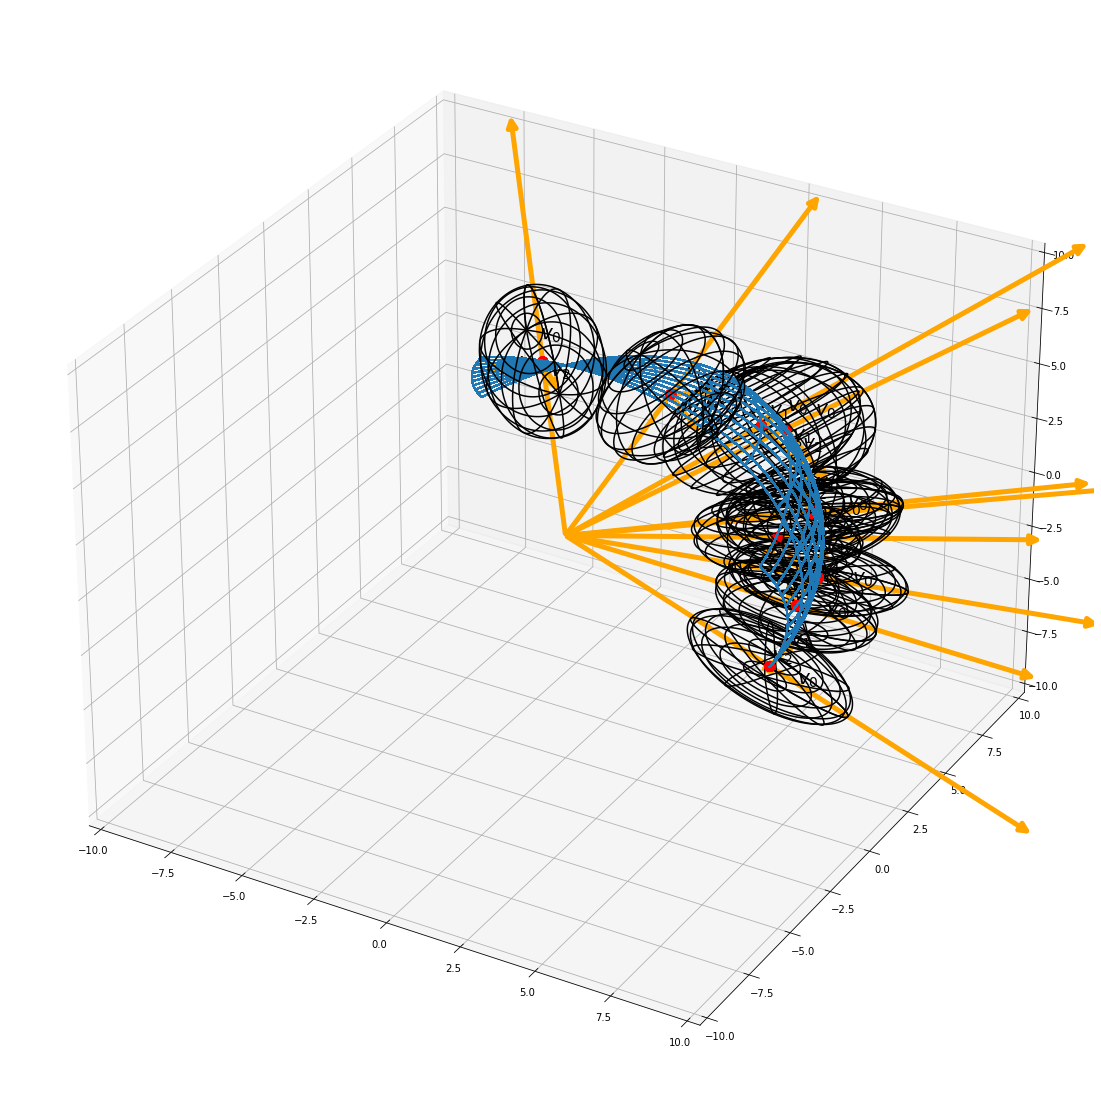

In [173]:
alpha, beta = np.random.normal(0, 1, 2)
number_of_random_points = 10
interval = 3
random_normal_coordinates, x, y, z = make_small_grape_bunch(np.array([-5, -3, 5]), alpha, beta, number_of_random_points, interval)
ellipsoid_test = ellipsoid(if_draw=True)


for i in range(len(random_normal_coordinates)-1):
    start_point = np.array([[0, 0, 0]])
    center_of_piece = np.array([random_normal_coordinates[i]])
    unit_ellipsoid_axes, radius_list = grape_piece_moment(start_point, center_of_piece)
    ellipsoid_test.draw_ellipsoid(unit_ellipsoid_axes, radius_list, center_of_piece)
    ellipsoid_test.draw_film(x, y, z, random_normal_coordinates)
    
ellipsoid_test.draw_film(x, y, z, random_normal_coordinates)
ellipsoid_test.show()

In [176]:
small_bunch_list


array([[ -1.90040353,   1.46958917,  -7.36548632],
       [  0.32202654,   2.73945493,   8.25355749],
       [ -1.98637789,  -0.87487976,  -7.5992074 ],
       [  0.08594398,   0.06136427,  10.4947137 ],
       [ -0.79128448,  -4.29314236,  -1.4943058 ],
       [  0.45881174,  -0.1785678 , -10.36810833],
       [ -0.64469237,  -1.67495991,  -9.48072865],
       [ -0.23748058,   4.48076555,  -0.49961012],
       [ -0.02045733,  -1.93383366,   9.48072865],
       [  0.29540674,   2.51300228,  -8.64860411],
       [ -2.62599612,   2.03069264,   1.82330587],
       [  0.30669627,  -4.12502029,   4.05662382],
       [ -1.62653494,  -3.66714635,   2.15047001],
       [ -1.10914943,  -3.35689833,   5.81616067],
       [ -1.99776238,   1.79410001,   6.620803  ],
       [  2.96650468,  -0.56787431,  -0.83212455],
       [  0.59393191,  -2.86514646,  -7.82527672],
       [  1.54094168,   0.75914108,   8.83316209],
       [ -2.85173511,  -0.40846153,   3.11766394],
       [  2.36460149,   2.61152

In [168]:
x.shape

(100, 100)

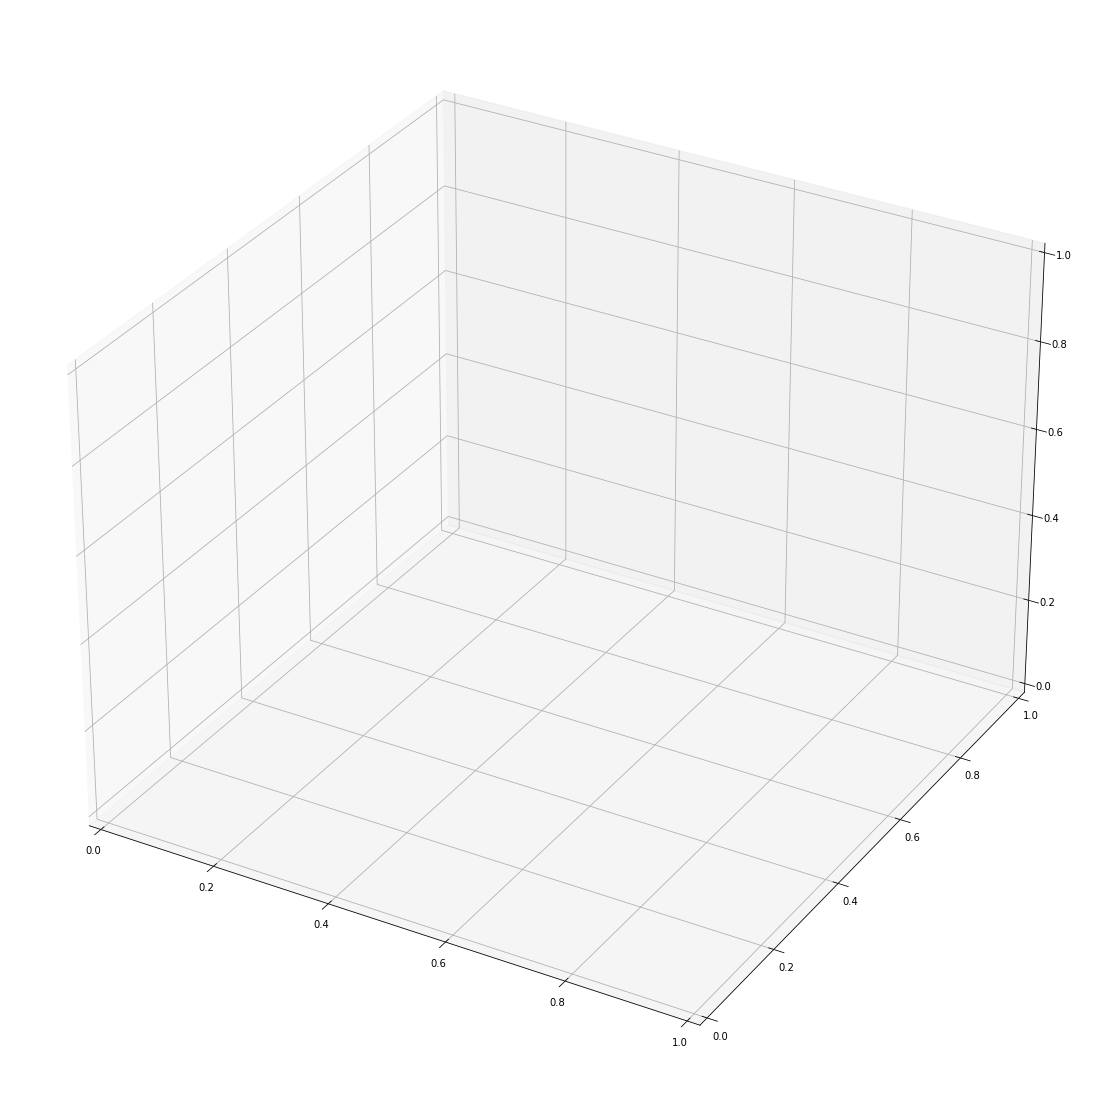

In [8]:
ellipsoid_test = ellipsoid(if_draw=True)



for i in range(len(random_normal_coordinates)-1):
    start_point = np.array([[0, 0, 0]])
    center_of_piece = np.array([random_normal_coordinates[i]])
    unit_ellipsoid_axes, radius_list = grape_piece_moment(start_point, center_of_piece)
    ellipsoid_test.draw_ellipsoid(unit_ellipsoid_axes, radius_list, center_of_piece)
    ellipsoid_test.draw_film(x, y, z, random_normal_coordinates)
